## Method 1 to read the file

In [6]:
!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point, Polygon
!pip install PyShp
import shapefile

!pip install xmltodict
import xmltodict
from pprint import pprint

import xml.etree.ElementTree as ET

!pip install dbfread
from dbfread import DBF

!pip install pycrs
import pycrs

     |████████████████████████████████| 217 kB 8.8 MB/s eta 0:00:01
  Created wheel for PyShp: filename=pyshp-2.1.2-py3-none-any.whl size=36215 sha256=1ebd018d5dfc37831b3eff29229323d902b796f53822c6aaaa1f4a83a8d28eaa
  Stored in directory: /Users/alex_yuefu/Library/Caches/pip/wheels/fc/5c/43/92beaadf045d95947eee5a8191da4b3bc439d750bb13a3d468
Successfully built PyShp
  Created wheel for pycrs: filename=PyCRS-1.0.2-py3-none-any.whl size=32681 sha256=d249d1261c09cad83f40c1805a597e8129bd7e189a19e1f33f606e20c7420eb0
  Stored in directory: /Users/alex_yuefu/Library/Caches/pip/wheels/3e/ce/32/1ec0aba6b9770681a423e82f0274c57d09ad2c20c2864901f9
Successfully built pycrs


In [2]:
%cd ./Dockless_Vehicle_Distribution_Zones/

/Users/alex_yuefu/OPR624/Project/Dockless_Vehicle_Distribution_Zones


In [3]:
%ls

Dockless_Vehicle_Distribution_Zones.cpg
Dockless_Vehicle_Distribution_Zones.dbf
Dockless_Vehicle_Distribution_Zones.prj
Dockless_Vehicle_Distribution_Zones.sbn
Dockless_Vehicle_Distribution_Zones.sbx
Dockless_Vehicle_Distribution_Zones.shp
Dockless_Vehicle_Distribution_Zones.shp.xml
Dockless_Vehicle_Distribution_Zones.shx


In [4]:
result = gpd.read_file("Dockless_Vehicle_Distribution_Zones.shp")
print(result)

   Dist_Zone      Pl2040Area  \
0          1  Northwest Core   
1          9       West Core   
2          2        Downtown   
3          6      University   
4          3  Northeast Core   
5          5  Southeast Core   
6          4       East Core   
7          8  Southwest Core   
8          7   Iroquois Park   

                                            geometry  
0  POLYGON ((1193691.611 287815.076, 1193720.000 ...  
1  POLYGON ((1204659.266 274362.969, 1204580.932 ...  
2  POLYGON ((1205218.946 280123.610, 1205220.827 ...  
3  POLYGON ((1212727.449 270748.279, 1212651.123 ...  
4  POLYGON ((1223601.797 287709.093, 1223876.488 ...  
5  POLYGON ((1220489.868 276140.251, 1220601.604 ...  
6  POLYGON ((1231939.731 292598.834, 1232793.000 ...  
7  POLYGON ((1198503.794 266260.022, 1198872.688 ...  
8  POLYGON ((1206324.874 244494.518, 1206129.823 ...  


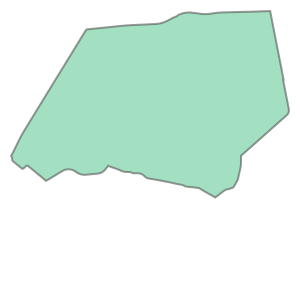

In [5]:
result.geometry[8]

## Method 2 to read the file

In [7]:
shape = shapefile.Reader("Dockless_Vehicle_Distribution_Zones.shp")

In [8]:
len(shape.shapeRecords())

9

In [9]:
#first feature of the shapefile
coordinate = {}
for i in range(9):
    feature = shape.shapeRecords()[i]
    coor= feature.shape.__geo_interface__ 
    coordinate[i] = coor['coordinates'][0]

In [10]:
coordinate.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8])

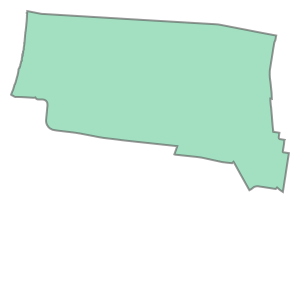

In [11]:
Polygon(coordinate[1])

In [12]:
testpoint = Point(1210000, 276000)
Polygon(coordinate[2]).contains(testpoint)

True

In [65]:
coordinate[8]

[(1206324.8737500012, 244494.5175000131),
 (1206129.8231408894, 244321.4936927706),
 (1205161.883487463, 243462.86215731502),
 (1204938.5075000226, 243268.7637500018),
 (1204938.2997677326, 243265.7456112504),
 (1204910.7400000393, 243241.54125002027),
 (1204911.3768664896, 243076.86716292799),
 (1204905.8351835012, 242813.23914302886),
 (1204904.7462500036, 242772.1712500006),
 (1204904.7392282486, 242769.60391266644),
 (1204893.487500012, 242419.7987500131),
 (1204846.8172914982, 242197.4739303589),
 (1204801.044957906, 241984.8254505396),
 (1204727.306250006, 241670.80000001192),
 (1204698.856971398, 241528.03756044805),
 (1204679.2300000489, 241440.68125000596),
 (1204672.9081635773, 241397.8228314519),
 (1204669.9805889279, 241383.13185448945),
 (1204644.689522028, 241293.01701134443),
 (1204613.9796726853, 241230.9475789219),
 (1204613.9450000077, 241230.87749999762),
 (1204613.9543662071, 241230.8716981858),
 (1204581.4999546558, 241183.9061742425),
 (1204555.7500061989, 241135.

## Try read xml

In [ ]:


with open('Dockless_Vehicle_Distribution_Zones.shp.xml') as fd:
    data = xmltodict.parse(fd.read())
pprint(data)

In [75]:

tree = ET.parse('Dockless_Vehicle_Distribution_Zones.shp.xml')
root = tree.getroot()

## Try read other data

In [83]:

for record in DBF('Dockless_Vehicle_Distribution_Zones.dbf'):
    pprint(record)

OrderedDict([('Dist_Zone', 1), ('Pl2040Area', 'Northwest Core')])
OrderedDict([('Dist_Zone', 9), ('Pl2040Area', 'West Core')])
OrderedDict([('Dist_Zone', 2), ('Pl2040Area', 'Downtown')])
OrderedDict([('Dist_Zone', 6), ('Pl2040Area', 'University')])
OrderedDict([('Dist_Zone', 3), ('Pl2040Area', 'Northeast Core')])
OrderedDict([('Dist_Zone', 5), ('Pl2040Area', 'Southeast Core')])
OrderedDict([('Dist_Zone', 4), ('Pl2040Area', 'East Core')])
OrderedDict([('Dist_Zone', 8), ('Pl2040Area', 'Southwest Core')])
OrderedDict([('Dist_Zone', 7), ('Pl2040Area', 'Iroquois Park')])


In [92]:
'''reference:
https://pypi.org/project/PyCRS/'''


crs = pycrs.load.from_file("Dockless_Vehicle_Distribution_Zones.prj")

# # Print some properties of the SpatialReference class object.
# #
# SR = desc.spatialReference
# print("Name:            " + SR.name)
# print("Type:            " + SR.type)
# print("isHighPrecision: " + str(SR.isHighPrecision))
# print("scaleFactor:     " + str(SR.scaleFactor))

In [93]:
pprint(data)

In [94]:
isinstance(crs, pycrs.ProjCS)

True

In [96]:
crs.to_proj4()

'+proj=lcc +datum=NAD83 +ellps=GRS80 +a=6378137.0 +rf=298.257222101 +pm=0 +x_0=1640416.666666667 +y_0=0.0 +lon_0=-84.25 +lat_1=37.96666666666667 +lat_2=38.96666666666667 +lat_0=37.5 +units=us-ft +axis=enu +no_defs'

In [97]:
crs.to_esri_wkt()

'PROJCS["NAD_1983_StatePlane_Kentucky_North_FIPS_1601_Feet", GEOGCS["GCS_North_American_1983", DATUM["D_North_American_1983", SPHEROID["GRS_1980", 6378137.0, 298.257222101]], PRIMEM["Greenwich", 0], UNIT["Degree", 0.0174532925199433], AXIS["Lon", EAST], AXIS["Lat", NORTH]], PROJECTION["Lambert_Conformal_Conic"], PARAMETER["False_Easting", 1640416.666666667], PARAMETER["False_Northing", 0.0], PARAMETER["Central_Meridian", -84.25], PARAMETER["Standard_Parallel_1", 37.96666666666667], PARAMETER["Standard_Parallel_2", 38.96666666666667], PARAMETER["Latitude_Of_Origin", 37.5], UNIT["Foot_US", 0.3048006096012192], AXIS["X", EAST], AXIS["Y", NORTH]]'

In [98]:
crs.to_ogc_wkt()

'PROJCS["NAD_1983_StatePlane_Kentucky_North_FIPS_1601_Feet", GEOGCS["GCS_North_American_1983", DATUM["North_American_Datum_1983", SPHEROID["GRS_1980", 6378137.0, 298.257222101]], PRIMEM["Greenwich", 0], UNIT["degree", 0.0174532925199433], AXIS["Lon", EAST], AXIS["Lat", NORTH]], PROJECTION["Lambert_Conformal_Conic"], PARAMETER["false_easting", 1640416.666666667], PARAMETER["false_northing", 0.0], PARAMETER["Central_Meridian", -84.25], PARAMETER["standard_parallel_1", 37.96666666666667], PARAMETER["standard_parallel_2", 38.96666666666667], PARAMETER["latitude_of_origin", 37.5], UNIT["Foot_US", 0.3048006096012192], AXIS["X", EAST], AXIS["Y", NORTH]]'